## Tema 3: Naive-bayes y KNN Aprendizaje automático

### Autor: José Miguel

### Prácticas Naive Bayes y KNN (ejercicio 2)

##### **2. Usando los datos almacenados en data2.csv, crea un modelo de clasificación usando los modelos de NaiveBayes mostrados en el [vídeo 5](https://vimeo.com/600140324). Indicad qué modelo da mejores resultados. Os toca investigar cómo cargar un archivo csv desde Google Collab.**


#### 1. Carga de datos desde el csv proporcionado.
Cargaremos las librerías fundamentales como numpy y pandas y cargaremos los datos en datasets.

In [1]:
import pandas as pd

df_data = pd.read_csv('csv/data2.csv')
# cambiar el nombre de las columnas a minúsculas y sin espacios por convección.
df_data.rename(columns={'Feature_1': 'feature_1', 'Feature_2': 'feature_2', 'Label': 'target'}, inplace=True)
# poner el target a enteros
df_data['target'] = df_data['target'].astype(int)
df_data

,feature_1,feature_2,target
0,0.496714,0.000000,0
1,0.647689,1.523030,0
2,0.000000,0.000000,0
3,1.579213,0.767435,0
4,0.000000,0.542560,0
...,...,...,...
995,3.800410,3.754291,1
996,4.188913,3.708304,1
997,3.351448,4.070150,1
998,2.973479,2.118125,1


#### 2. Visualización de los datos

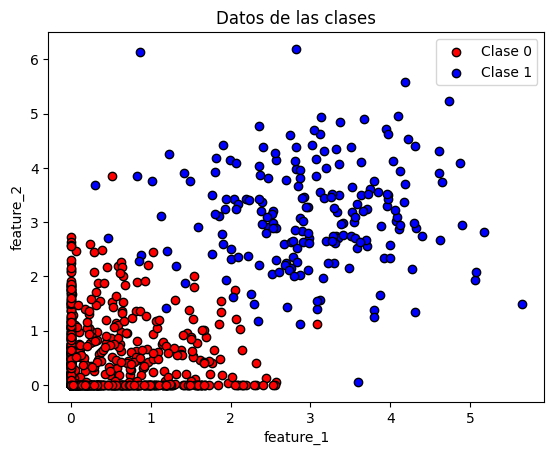

In [2]:
import matplotlib.pyplot as plt

COLORS = ('red', 'blue')

for i in (0, 1):
    data = df_data[df_data['target'] == i]
    plt.scatter(data['feature_1'], data['feature_2'], c=COLORS[i], edgecolors='k', label=f"Clase {i}")

plt.title('Datos de las clases')
plt.xlabel('feature_1')
plt.ylabel('feature_2')
plt.legend()
plt.show()

#### 3. Preprocesamiento de datos

In [3]:
# Dividiremos el df_final en un conjunto de datos de test y entrenamiento
from sklearn.model_selection import train_test_split

TEST_SIZE = 0.33

train, test = train_test_split(df_data, test_size = TEST_SIZE)
# sino quitamos datos no hace falta ajustar los indíces
train.reset_index(inplace = True)
test.reset_index(inplace = True)

#### 4. Creación de los modelos y elección del mejor de ellos

In [4]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
# siempre metrics
from sklearn.naive_bayes import BernoulliNB, CategoricalNB, ComplementNB, GaussianNB, MultinomialNB

X_train = train[['feature_1', 'feature_2']]
X_test = test[['feature_1', 'feature_2']]
# poner corchetes dobles para las x porque es una matriz
y_train = train['target']
y_test = test['target']

#model_names = ["GaussianNB", 'BernouilliNB', 'Multinomial', 'ComplementNB', 'CategoricalNB']
model_method = [GaussianNB(), BernoulliNB(), MultinomialNB(), ComplementNB(), CategoricalNB()]

for i in model_method:
    
    i.fit(X_train, y_train)
    y_pred = i.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    # Mostrar el informe de clasificación
    print(f"\nInforme de clasificación para {i}: {accuracy}")
    print(classification_report(y_test, y_pred, target_names=['feature_1', 'feature_2']))


Informe de clasificación para GaussianNB(): 0.9818181818181818
              precision    recall  f1-score   support

   feature_1       0.99      0.98      0.99       260
   feature_2       0.94      0.97      0.96        70

    accuracy                           0.98       330
   macro avg       0.97      0.98      0.97       330
weighted avg       0.98      0.98      0.98       330


Informe de clasificación para BernoulliNB(): 0.7878787878787878
              precision    recall  f1-score   support

   feature_1       0.79      1.00      0.88       260
   feature_2       0.00      0.00      0.00        70

    accuracy                           0.79       330
   macro avg       0.39      0.50      0.44       330
weighted avg       0.62      0.79      0.69       330


Informe de clasificación para MultinomialNB(): 0.7878787878787878
              precision    recall  f1-score   support

   feature_1       0.79      1.00      0.88       260
   feature_2       0.00      0.00      0.

C:\Users\José Miguel\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\José Miguel\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\José Miguel\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_

#### 5. Matriz de confusión y evaluación del modelo

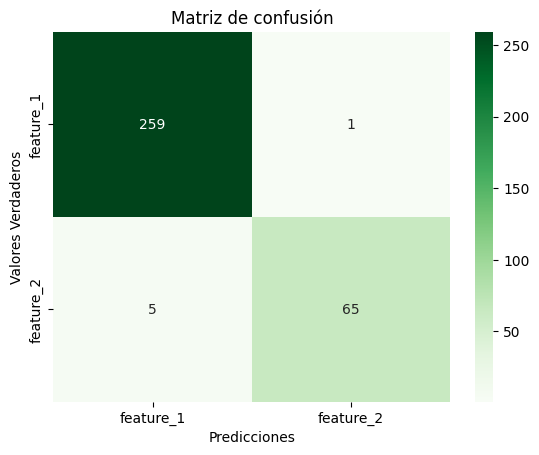

In [5]:
from matplotlib import pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
classes = ('feature_1', 'feature_2')

sns.heatmap(cm, annot=True, cmap='Greens', xticklabels=classes, yticklabels=classes, fmt='d')
# fmt te lo formateo a digito
plt.title('Matriz de confusión')
plt.xlabel('Predicciones')
plt.ylabel('Valores Verdaderos')
plt.show()